90%分位数: 7699.0ns
99%分位数: 43468.0ns


/home/zhousc/miniconda3/envs/dl310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7037: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


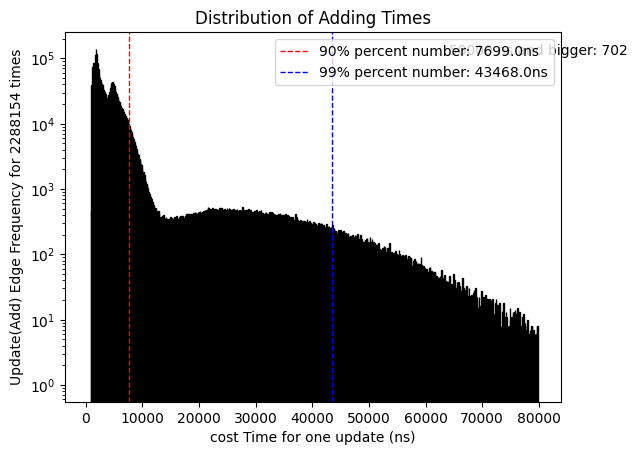

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取日志文件
with open('big_high_freq.log', 'r') as file:
    log_data = file.readlines()

# 提取添加时间与安全/不安全更新标记
adding_times = []
update_types = []  # 记录每个添加时间是否为unsafe update (True为unsafe, False为safe)
total_num = 0

for i, line in enumerate(log_data):
    match = re.search(r'Duration: (\d+) ns', line)
    if match:
        # 提取当前行的添加时间
        adding_times.append(float(match.group(1)))
        total_num += 1
        
        # 查看当前行的下一行是否包含"Unsafe update number:"
        if i + 1 < len(log_data):  # 确保不超出范围
            next_line = log_data[i + 1]
            unsafe_match = re.search(r'Unsafe update number: (\d+)', next_line)
            if unsafe_match:
                # 如果有Unsafe update，则标记为不安全更新
                update_types.append(True)
            else:
                # 如果没有Unsafe update，则标记为安全更新
                update_types.append(False)

# 计算90%分位数
percentile_90 = np.percentile(adding_times, 90)
print(f'90%分位数: {percentile_90}ns')

# 计算99%分位数
percentile_99 = np.percentile(adding_times, 99)
print(f'99%分位数: {percentile_99}ns')

# 定义区间
bins = np.arange(250, 80000, 125)
bins = np.append(bins, [float('inf')])  # 添加一个无限大的区间

# 统计每个区间的频率
hist, bin_edges = np.histogram(adding_times, bins=bins)

# 打印每个区间的频率
# for i in range(len(hist)):
#     if i == len(hist) - 1:
#         print(f'{bin_edges[i]} ns 及以上: {hist[i]}')
#     else:
#         print(f'{bin_edges[i]} ns - {bin_edges[i+1]} ns: {hist[i]}')

# 绘制直方图
plt.hist(adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {total_num} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()



# plt.savefig('adding_times_distribution_Nano2.png')
plt.show()
# print(hist)


90%分位数: 43344.200000000004ns
99%分位数: 65370.76000000002ns


/home/zhousc/miniconda3/envs/dl310/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7037: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


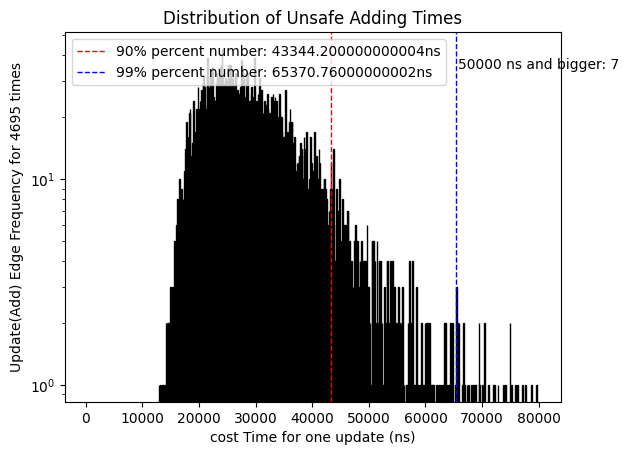

In [6]:
unsafe_adding_times = [adding_times[i] for i in range(len(update_types)) if update_types[i]]

# 计算90%分位数
percentile_90 = np.percentile(unsafe_adding_times, 90)
print(f'90%分位数: {percentile_90}ns')

# 计算99%分位数
percentile_99 = np.percentile(unsafe_adding_times, 99)
print(f'99%分位数: {percentile_99}ns')

# 定义区间
bins = np.arange(250, 80000, 125)
bins = np.append(bins, [float('inf')])  # 添加一个无限大的区间

# 统计每个区间的频率
hist, bin_edges = np.histogram(unsafe_adding_times, bins=bins)

# 打印每个区间的频率
# for i in range(len(hist)):
#     if i == len(hist) - 1:
#         print(f'{bin_edges[i]} ns 及以上: {hist[i]}')
#     else:
#         print(f'{bin_edges[i]} ns - {bin_edges[i+1]} ns: {hist[i]}')

# 绘制直方图
plt.hist(unsafe_adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {len(unsafe_adding_times)} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Unsafe Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()

# plt.savefig('adding_times_distribution_Nano2.png')
plt.show()
# print(hist)


90%分位数: 7643.0ns
99%分位数: 43256.0ns


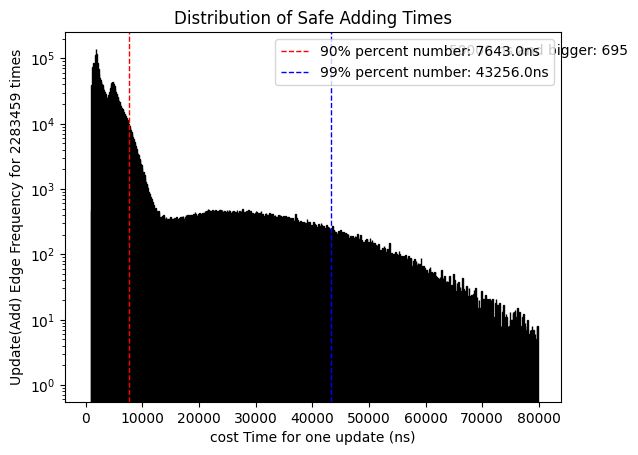

In [7]:
safe_adding_times = [adding_times[i] for i in range(len(update_types)) if not update_types[i]]

# 计算90%分位数
percentile_90 = np.percentile(safe_adding_times, 90)
print(f'90%分位数: {percentile_90}ns')

# 计算99%分位数
percentile_99 = np.percentile(safe_adding_times, 99)
print(f'99%分位数: {percentile_99}ns')

# 定义区间
bins = np.arange(250, 80000, 125)
bins = np.append(bins, [float('inf')])  # 添加一个无限大的区间

# 统计每个区间的频率
hist, bin_edges = np.histogram(safe_adding_times, bins=bins)

# 打印每个区间的频率
# for i in range(len(hist)):
#     if i == len(hist) - 1:
#         print(f'{bin_edges[i]} ns 及以上: {hist[i]}')
#     else:
#         print(f'{bin_edges[i]} ns - {bin_edges[i+1]} ns: {hist[i]}')

# 绘制直方图
plt.hist(safe_adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {len(safe_adding_times)} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Safe Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()

# plt.savefig('adding_times_distribution_Nano2.png')
plt.show()
# print(hist)
